In [69]:
rm -r dogImages

In [70]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip
!rm dogImages.zip

--2019-02-21 14:21:21--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 54.231.236.37
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|54.231.236.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  46.8MB/s    in 24s     

2019-02-21 14:21:45 (45.8 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

In [34]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip


--2019-02-21 14:01:00--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.1
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  51.2MB/s    in 4.1s    

2019-02-21 14:01:04 (45.4 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [35]:
!unzip lfw.zip
!rm lfw.zip

Archive:  lfw.zip
   creating: lfw/
  inflating: lfw/.DS_Store           
   creating: __MACOSX/lfw/
  inflating: __MACOSX/lfw/._.DS_Store  
   creating: lfw/Aaron_Eckhart/
  inflating: lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Eckhart/
  inflating: __MACOSX/lfw/Aaron_Eckhart/._Aaron_Eckhart_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Eckhart  
   creating: lfw/Aaron_Guiel/
  inflating: lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Guiel/
  inflating: __MACOSX/lfw/Aaron_Guiel/._Aaron_Guiel_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Guiel  
   creating: lfw/Aaron_Patterson/
  inflating: lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Patterson/
  inflating: __MACOSX/lfw/Aaron_Patterson/._Aaron_Patterson_0001.jpg  
  inflating: __MACOSX/lfw/._Aaron_Patterson  
   creating: lfw/Aaron_Peirsol/
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
   creating: __MACOSX/lfw/Aaron_Peirsol/
  inflatin

In [6]:
!wget https://drive.google.com/open?id=1ydlaVwVvuTUk6lPo_wPH2DAu6k66u8d9

--2019-02-22 15:57:50--  https://drive.google.com/open?id=1ydlaVwVvuTUk6lPo_wPH2DAu6k66u8d9
Resolving drive.google.com (drive.google.com)... 64.233.181.102, 64.233.181.113, 64.233.181.100, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.102|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/file/d/1ydlaVwVvuTUk6lPo_wPH2DAu6k66u8d9/view?usp=drive_open [following]
--2019-02-22 15:57:50--  https://drive.google.com/file/d/1ydlaVwVvuTUk6lPo_wPH2DAu6k66u8d9/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1ydlaVwVvuTUk6lPo_wPH2DAu6k66u8d9’

open?id=1ydlaVwVvuT     [ <=>                ] 134.61K  --.-KB/s    in 0.01s   

2019-02-22 15:57:50 (13.0 MB/s) - ‘open?id=1ydlaVwVvuTUk6lPo_wPH2DAu6k66u8d9’ saved [137841]



In [28]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset

print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


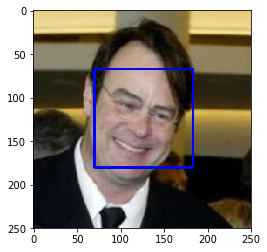

In [29]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [30]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
***Percentage of the first 100 images in human_files have a detected human face is 98%
Percentage of the first 100 images in dog_files have a detected human face is 17% ***

In [31]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
human_no_human = 0
human_no_dog=0
for img in human_files_short:
    if face_detector(img):
        human_no_human+=1
for img in dog_files_short:
      if face_detector(img):
        human_no_dog+=1
percent_human = (human_no_human /len(human_files_short)) * 100
percnt_human = (human_no_dog / len(dog_files_short)) * 100

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
print('percentage of the first 100 images in human_files have a detected human face is ')
print(percent_human)
print('percentage of the first 100 images in dog_files have a detected human face is ')
print (percnt_human)


percentage of the first 100 images in human_files have a detected human face is 
98.0
percentage of the first 100 images in dog_files have a detected human face is 
17.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [32]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [33]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [34]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    img = Image.open(img_path)
    normalize = transforms.Normalize( mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize])
    img_img = transform(img)
    img_img.unsqueeze_(0)
    if use_cuda:
        img_img = img_img.cuda()
    log_ps=VGG16(img_img)
    ps=torch.exp(log_ps)
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    VGG16.eval()
    outputs = VGG16(img_img)
    return torch.max(outputs,1)[1].item()# predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [35]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    return ((pred <= 268) & (pred >= 151))# true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
***Percentage of the images in human_files_short have a detected dog is 1%
Percentage of the images in dog_files_short have a detected dog is 99%***

In [36]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
dog_no_human = 0
dog_no_dog=0
for img in human_files_short:
      if dog_detector(img):
            dog_no_human+=1
for img in dog_files_short:
      if dog_detector(img):
            dog_no_dog+=1
percent_dog =(dog_no_human/len(human_files_short))*100
percnt_dog =(dog_no_dog/len(dog_files_short))*100
print('percentage of the first 100 images in human_files have a detected dog face is ')
print(percent_dog)
print('percentage of the first 100 images in dog_files have a detected human dog is ')
print (percnt_dog)

percentage of the first 100 images in human_files have a detected dog face is 
1.0
percentage of the first 100 images in dog_files have a detected human dog is 
98.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [37]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [38]:
cd /home/workspace/dog_project

/home/workspace/dog_project


In [39]:
import os
from torchvision import datasets
normalize = transforms.Normalize( mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocessor_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), 
    normalize])
preprocessor_test = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(), 
    normalize])
data_dir= '/dogImages'
train_data = datasets.ImageFolder('dogImages/train', transform=preprocessor_train)
test_data = datasets.ImageFolder('dogImages/test', transform=preprocessor_test)
valid_data = datasets.ImageFolder('dogImages/valid', transform=preprocessor_test)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=20,shuffle=True,num_workers=0)
testloader = torch.utils.data.DataLoader(test_data, batch_size=20,shuffle=True,num_workers=0)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=20, shuffle=True,num_workers=0)

loaders_scratch = {
    "train" : trainloader,
    "test" : testloader,
    "valid" : validloader,
}
print("train_data size", len(train_data))
print("test_data size", len(test_data))
print("valid_data size", len(valid_data))


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


train_data size 6680
test_data size 836
valid_data size 835


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: *** Code resizes the images by cropping. I chose the size to be 224 of input tensor so that big images reduces to smaller size and operations can be carried forward easily.*** 

---


*** Yes, I did horizontal flip.***

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [40]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3,32,3,stride=2,padding=1)
            self.conv2 = nn.Conv2d(32,64, 3,stride=2,padding=1)
            self.conv3 = nn.Conv2d(64,128, 3, padding=1)
            self.conv4 = nn.Conv2d(128,256, 3, stride=2, padding=1)
            self.pool = nn.MaxPool2d(2)
            self.fc1 = nn.Linear(4*4*256,1024)
            self.fc2 = nn.Linear(1024,512)
            self.fc3 = nn.Linear(512,133)
            self.dropout = nn.Dropout(0.25)
        def forward(self, x):
        ## Define forward behavior
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = self.pool(F.relu(self.conv3(x)))
            x = F.relu(self.conv4(x))
        # flatten image input
            x = x.view(-1, 4*4*256)
        # add 1st hidden layer, with relu activation function AND dropout layer
            x = F.relu(self.fc1(self.dropout(x)))
        # add 2nd hidden layer, with relu activation function and dropout layer
            x = F.relu(self.fc2(self.dropout(x)))
            x =self.fc3(self.dropout(x))
            return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
***Initially I started with 4 convolutional layers and kernel as 3 * 3 so as to start from small and to be efficient.
I took reLU as activation function.
To calculate value of input features in fc I used formula W2 = (W1−F+2P)/S+1 & H2= (H1−F+2P)/S+1 where 
Number of filters K,
their spatial extent F,
the stride S,
the amount of zero padding P.
By using maxpool layer after each convolutional layer decreased dimensionality.
source = http://cs231n.github.io/convolutional-networks/
so, we calculated input features to be 4 * 4 * 256 (since, 256 being the depth and 4 * 4 was result of calculation)
I introduced dropout layer when I found model was overfittingas its regularisation technique.***

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [41]:
import torch.optim as optim


### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch =  optim.SGD(model_scratch.parameters(), lr=0.15)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders["train"]):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                      (epoch, batch_idx + 1, train_loss))
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                  valid_loss))
            torch.save(model.state_dict(), 'PROJECT2.pt')
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch,
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.891025
Epoch 1, Batch 101 loss: 4.888103
Epoch 1, Batch 201 loss: 4.885331
Epoch 1, Batch 301 loss: 4.884149
Epoch: 1 	Training Loss: 4.883262 	Validation Loss: 4.867549
Validation loss decreased (inf --> 4.867549).  Saving model ...
Epoch 2, Batch 1 loss: 4.865824
Epoch 2, Batch 101 loss: 4.860855
Epoch 2, Batch 201 loss: 4.855218
Epoch 2, Batch 301 loss: 4.851652
Epoch: 2 	Training Loss: 4.847617 	Validation Loss: 4.809260
Validation loss decreased (4.867549 --> 4.809260).  Saving model ...
Epoch 3, Batch 1 loss: 4.666349
Epoch 3, Batch 101 loss: 4.782420
Epoch 3, Batch 201 loss: 4.788803
Epoch 3, Batch 301 loss: 4.784831
Epoch: 3 	Training Loss: 4.782087 	Validation Loss: 4.826525
Epoch 4, Batch 1 loss: 4.702586
Epoch 4, Batch 101 loss: 4.738725
Epoch 4, Batch 201 loss: 4.740104
Epoch 4, Batch 301 loss: 4.730771
Epoch: 4 	Training Loss: 4.726828 	Validation Loss: 4.683564
Validation loss decreased (4.809260 --> 4.683564).  Saving model ...
Epoch 5, Batch 1 l

FileNotFoundError: [Errno 2] No such file or directory: 'model_scratch.pt'

In [42]:
model_scratch.load_state_dict(torch.load('PROJECT2.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.767316


Test Accuracy: 14% (122/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [43]:
## TODO: Specify data loaders
data_dir= 'dogImages'
train_data = datasets.ImageFolder(data_dir + '/train', transform=preprocessor_train)
test_data = datasets.ImageFolder(data_dir + '/test', transform=preprocessor_test)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=preprocessor_test)

train_loaders = torch.utils.data.DataLoader(train_data, batch_size=32,shuffle=True,num_workers=4)
testloaders = torch.utils.data.DataLoader(test_data, batch_size=32,shuffle=True,num_workers=4)
validloaders = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=True,num_workers=4)

loaders_transfer = {
    "train" : trainloader,
    "test" : testloader,
    "valid" : validloader,
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [44]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained=True)
if use_cuda:
    model_transfer = model_transfer.cuda()

In [45]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [20]:
for param in model_transfer.parameters():
    param.requires_grad = False

In [46]:
import torch.optim as optim
#model.fc = nn.Linear(model.fc.in_features, 102)
from collections import OrderedDict
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 1024)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc3',nn.Linear(500,133))
                          ]))
model_transfer.fc=classifier
model_transfer = model_transfer.to(device)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
***I used transfer learning to create cnn as instructed. I took resnet152, as this model secured first position in ILSVRC competiton for image classification.
Source: http://arxiv.org/abs/1512.03385
On having a look on resnet152 architecture, I found in linear layer it takes in_features as 2048 and out_features as 1000. As it was trained to classify 1000 images. So, I pulled out fc i.e. Linear/Dense layer and made changes to it in order to classify 133 dog breeds for our project.
This architecture seems fine as we needed 60% accuracy on test set and here on test set we are getting accuracy = %.***


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [47]:
import torch.optim as optim

criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer =  optim.SGD(model_transfer.fc.parameters(), lr=0.01)

In [48]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [51]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [29]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# train the model
def train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer):
    valid_loss_min = np.Inf # track change in validation loss
    for epoch in range(1, n_epochs+1):
        # keep track of training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model_transfer.train()
    for data, target in loaders_transfer['train']:
        data = data.to(device)
        target = target.to(device)
        # clear the gradients of all optimized variables
        optimizer_transfer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_transfer(data)
        # calculate the batch loss
        loss = criterion_transfer(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_transfer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model_transfer.eval()
    for data, target in loaders_transfer['valid']:
        data = data.to(device)
        target = target.to(device)
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_transfer(data)
        # calculate the batch loss
        loss = criterion_transfer(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(loaders_transfer['train'].dataset)
    valid_loss = valid_loss/len(loaders_transfer['valid'].dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        torch.save(model_transfer.state_dict(), 'model_transfer.pt')
        valid_loss_min = valid_loss


In [50]:
# train the model
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer)

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [52]:
def test_transfer(loaders, model, criterion, use_cuda):
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [66]:
test_transfer(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.944494


Test Accuracy: 75% (627/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [57]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
#def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    #return None

In [61]:
loaders_transfer['train'].dataset.classes[:5]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute']

In [62]:
class_names[:5]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute']

In [64]:
from PIL import Image
import cv2
import torch
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    img = Image.open(img_path)
    normalize = transforms.Normalize( mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize])
    img_i=transform(img)
    #image_tensor = torch.from_numpy(img_i).type(torch.FloatTensor)
    # Add batch of size 1 to image
    #model_input = img_i
    #model_input = image_tensor.unsqueeze(0)
    img_i.unsqueeze_(0)
    if use_cuda:
        img_i = img_i.cuda()
    
    log_ps=model_transfer(img_i)
    ps=torch.exp(log_ps)
    top_ps, top_class = ps.topk(1,dim=1)
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    return class_names[top_class[:1,:]]# predicted class index
   # return top_class[:1,:]

In [80]:
predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

'Dachshund'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [81]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        prediction = predict(img_path)
        print("Dogs Detected!\nIt looks like a {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict(img_path)
        print("Hello, human!\nIf you were a dog..You may look like a {0}".format(prediction))
    else:
        print("Error! Can't detect anything..")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
***Output is little bad. It couldn't detect human face in one picture as picture little tilted. Dog pictures had lot of background i.e. noise so it couldn't correct dog breed. :|
Solutions according to me can be as follows:***
***1. more training data can be added as there seem to be only a few pictures in some dog category so accuracy can be increased by this.***

***2. Hyper-parameters i.e. weights, learning rates, dropouts, batch_sizes, and optimizers will be helpful to improve performances i.e. we may look for better network architecture if this isn't suiting well.***

***3. Adding noise to the data by data augmentation like flipping, rotating etc can improve the algorithm.***

In [82]:
my_human_files=['human1.jpg','human2.jpg']
my_dog_files=['poodle.jpg','keeshond.jpg']

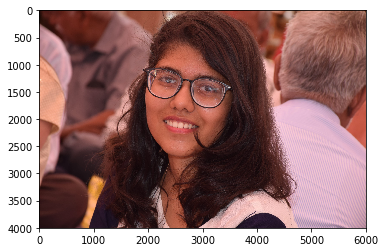

Hello, human!
If you were a dog..You may look like a Welsh springer spaniel


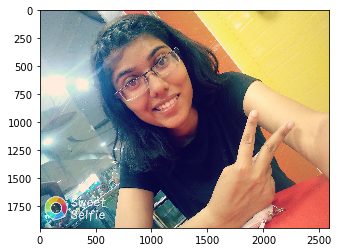

Error! Can't detect anything..


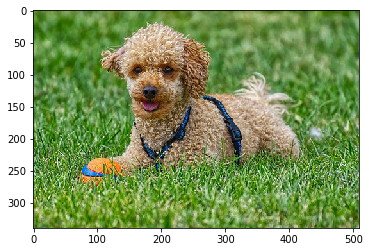

Dogs Detected!
It looks like a Smooth fox terrier


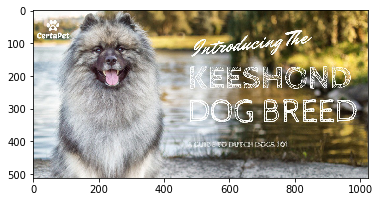

Error! Can't detect anything..


In [84]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((my_human_files[:3], my_dog_files[:3])):
    run_app(file)